-------------
0.0
.
-------------
0.09969348111658158
.
-------------
0.1988290838801481
.
-------------
0.2990127402264822
.
-------------
0.39855884019443927
.
-------------
0.4982017722406894
.
-------------
0.5985957974811558
.
-------------
0.6973160739916293
.
-------------
0.7966113541391182
.
-------------
0.8970989611637731
.
-------------
0.9967948717948718
.
[[0.01413335 0.06675018 0.84796065]
 [0.01484157 0.0702063  0.84955946]
 [0.01538305 0.07213561 0.85376038]
 [0.01564989 0.07625763 0.857533  ]
 [0.01606233 0.07954456 0.86184967]
 [0.01614435 0.08245793 0.86625876]
 [0.0162642  0.08691785 0.8703156 ]
 [0.01620165 0.09049338 0.87575273]
 [0.01597969 0.09485708 0.88292855]
 [0.01588772 0.09803598 0.88532033]
 [0.01518458 0.10171123 0.89265309]]
cantidad de pares de comunicacion


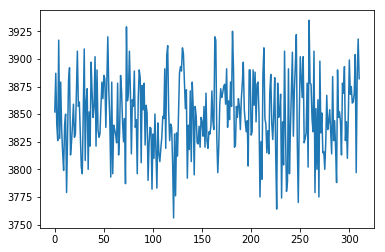

Porcentaje grupos con distinta media de crimen
[0.65 0.3  0.05]
Vector media de crimen por grupos
[0.   0.05 1.7 ]
velocidad de olvido
0.5
impacto de la inseguridad nu
0.9
Resistencia a la inseguridad mu
0.1


In [22]:
import numpy as np
import random
import matplotlib.pyplot as plt

n = 10000  # numero de personas
T = 312  # numero de periodos 6 años 
s = np.random.rand(n)  # vector PoS de las personas en el intante t, al principio aleatorio
g=np.zeros(n)#vector identificacion de grupo
psi = 0.5  # velocidad perdida de memoria
nu = 0.9  # Impacto de la inseguridad
mu = 0.1  # Resistencia a la inseguridad
St = np.zeros((T,n ))  # PoS a lo largo del tiempo
m = 3  # cantidad de grupos con distinta tasa de crimen por periodo
lamda = np.array([0,0.05,1.7])  # tasas de crimen de los grupos
lamda[0]=0 #grupo inmune
q = np.array([0.65, 0.3, 0.05])  # porcentajes de los grupos en la poblacion total

#identificacion de cada sujeto con su respectiva media de crimen 
for i in range(int(n*q[0])):
    g[i]=lamda[0]
for i in range(int(n*q[0]),int(n*(q[0]+q[1]))):
    g[i]=lamda[1]
for i in range(int(n*(q[0]+q[1])),n):
    g[i]=lamda[2]

        
perceptionHomo=np.zeros((11,3))#percepcion segun la homofilia de los 3 grupos
homofilia=np.zeros(T)
for h in range(11):
# calculo de la Pos en el intante t
# en t=0 es s
    print("-------------")
    
    St[0] = s
    parescom=np.zeros(T)#cantidad pares de comunicacion en cada periodo
    commismogrupo=np.zeros(T)#cantidad de comunicaciones en el mismo grupo
    for t in range(1,T):
        # Al inicio de cada periodo aplicamos la perdida de memoria
        s = psi * s
        salto = []  # vector en el cual esta la gente con la que ya hubo comunicacion
        for k in range(n):
            if k in salto:
                continue
            if len(salto)==len(s)-1:
                continue
            # Flag para modelar interacción social
            intSoc = bool(random.getrandbits(1))  # aleatoriamente escoge verdadero o falso
            if intSoc == True:
                #segun la homofilia miramos si se comunica entre su propio grupo o por fuera
                varhomo=np.random.binomial(1,h/10.0)
                if varhomo==1:#si es 1 se comunica en su mismo grupo
                    # seleccionamos con quien se da la comunicacion
                    j = np.random.randint(n)
                    contador=0
                    while j == k or j in salto or g[k]!=g[j]:
                        j = np.random.randint(n)
                        contador=contador+1
                        if contador>5:
                            break
                    commismogrupo[t]=commismogrupo[t]+1
                elif varhomo==0:#si es 0 se comunica con otro grupo
                    # seleccionamos con quien se da la comunicacion
                    j = np.random.randint(n)
                    contador=0
                    while j == k or j in salto or g[k]==g[j]:
                        j = np.random.randint(n)
                        contador=contador+1
                        if contador>5:
                            break
                s[k] = s[k] - mu * (s[k] - s[j])
                s[j] = s[j] - nu * (s[j] - s[k])
                # añadimos a la lista de los que ya se comunicaron a las personas k y j
                salto.append(j)
                salto.append(k)
                    
        parescom[t]=len(salto)/2
        homofilia[t]=commismogrupo[t]/parescom[t]
                   
        for k in range(n):
            # numero de crimenes sufridos por la persona k 
            X = np.random.poisson(g[k])
            # posicion hubo crimen o no
            I = 0
            if X >= 1:  # si hubo al menos un crimen I=1 de lo contrario I=0
                I = 1
            # efecto del crimen en la percepcion de k para el siguiente periodo
            s[k] = I + (1 - I) * s[k]    
        St[t] = s
    print(np.mean(homofilia))
    perceptionHomo[h][0]=np.mean(np.mean(St[104:,range(int(n*q[0]))],axis=1))
    perceptionHomo[h][1]=np.mean(np.mean(St[104:,range(int(n*q[0]),int(n*q[0]+n*q[1]))],axis=1))
    perceptionHomo[h][2]=np.mean(np.mean(St[104:,range(int(n*q[0]+n*q[1]),n)],axis=1))
    print(".")
print(perceptionHomo)
print("cantidad de pares de comunicacion")
plt.plot(parescom[1:])
plt.show()
print("Porcentaje grupos con distinta media de crimen")
print(q)
print("Vector media de crimen por grupos")
print(lamda)
print("velocidad de olvido")
print(psi)
print("impacto de la inseguridad nu")
print(nu)
print("Resistencia a la inseguridad mu")
print(mu)


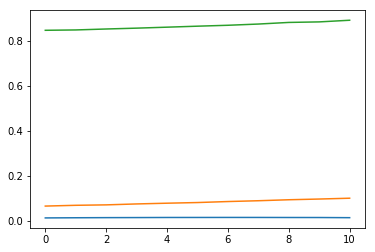

In [23]:
plt.plot(perceptionHomo)